In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Loan Analysis/loan2cleaneddataset.csv")
data.info()
sns.set(style="whitegrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   30000 non-null  int64  
 1   Customer ID                  30000 non-null  object 
 2   Name                         30000 non-null  object 
 3   Gender                       29947 non-null  object 
 4   Age                          30000 non-null  int64  
 5   Income (USD)                 25424 non-null  float64
 6   Income Stability             28317 non-null  object 
 7   Profession                   30000 non-null  object 
 8   Type of Employment           22730 non-null  object 
 9   Location                     30000 non-null  object 
 10  Loan Amount Request (USD)    30000 non-null  float64
 11  Current Loan Expenses (USD)  29828 non-null  float64
 12  Expense Type 1               30000 non-null  object 
 13  Expense Type 2  

In [41]:
properti = pd.DataFrame(data['Property Location'].value_counts()/len(data['Property Location'])*100)
properti

,Property Location
Semi-Urban,34.623333
Rural,33.470000
Urban,30.720000


In [43]:
creditcardstatus = pd.DataFrame(data['Has Active Credit Card'].value_counts()/len(data['Has Active Credit Card'])*100)
creditcardstatus

,Has Active Credit Card
Active,32.570000
Inactive,31.553333
Unpossessed,30.656667


In [44]:
loc = pd.DataFrame(data['Location'].value_counts()/len(data['Location'])*100)
loc

,Location
Semi-Urban,71.876667
Rural,17.793333
Urban,10.330000


In [49]:
data['Income (USD)'].describe()

count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64

In [10]:
#  density plots creation
def plot_density(column, color='blue'):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[column], shade=True, color=color)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [11]:
# bar plots creation
def plot_barplot(column, palette='viridis'):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=data, palette=palette)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()



In [22]:
#  box plots for outlier detection
def plot_boxplot(column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [34]:

# outliers using IQR 
def detect_outliers(column):
    try:
        data_clean = data.dropna(subset=[column])
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_clean[(data_clean[column] < lower_bound) | (data_clean[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        print(f"{column}: {num_outliers} outliers")

        if num_outliers > 0:
            display(outliers[[column]])
    except Exception as e:
        print(f"Error in column '{column}': {str(e)}")

for col in data.columns:
    if np.issubdtype(data[col].dtype, np.number):  
        detect_outliers(col)
    else:
        print(f"Skipping non-numeric column: {col}")


Unnamed: 0: 0 outliers
Skipping non-numeric column: Customer ID
Skipping non-numeric column: Name
Skipping non-numeric column: Gender
Age: 0 outliers
Income (USD): 1124 outliers


,Income (USD)
27,5350.94
36,5302.28
39,7885.56
41,5330.72
57,5445.60
...,...
29851,5407.64
29853,13646.44
29878,5681.69
29904,6685.40


Skipping non-numeric column: Income Stability
Skipping non-numeric column: Profession
Skipping non-numeric column: Type of Employment
Skipping non-numeric column: Location
Loan Amount Request (USD): 752 outliers


,Loan Amount Request (USD)
7,240311.77
87,258359.02
141,262719.40
164,281022.99
199,278598.47
...,...
29800,241941.44
29811,258030.61
29833,258810.42
29904,281341.55


Current Loan Expenses (USD): 857 outliers


,Current Loan Expenses (USD)
87,938.59
131,1162.36
164,947.45
169,1118.79
220,932.19
...,...
29749,-999.00
29784,1322.90
29797,1035.66
29813,957.45


Skipping non-numeric column: Expense Type 1
Skipping non-numeric column: Expense Type 2
Dependents: 432 outliers


,Dependents
29,5.0
146,5.0
177,5.0
210,5.0
223,5.0
...,...
29753,6.0
29762,5.0
29863,5.0
29964,5.0


Credit Score: 0 outliers
No. of Defaults: 5818 outliers


,No. of Defaults
3,1
4,1
5,1
8,1
15,1
...,...
29979,1
29980,1
29983,1
29993,1


Skipping non-numeric column: Has Active Credit Card
Property ID: 0 outliers
Property Age: 1105 outliers


,Property Age
27,5350.94
36,5302.28
39,7885.56
41,5330.72
57,5445.60
...,...
29851,5407.64
29853,13646.44
29878,5681.69
29904,6685.40


Property Type: 0 outliers
Skipping non-numeric column: Property Location
Co-Applicant: 4484 outliers


,Co-Applicant
2,0
11,0
18,0
20,0
24,0
...,...
29975,0
29983,0
29987,0
29988,0


Property Price: 863 outliers


,Property Price
7,401040.70
87,437535.71
111,364087.25
129,391691.70
164,519776.20
...,...
29706,356382.10
29794,412897.31
29811,451889.33
29833,371981.50


Loan Sanction Amount (USD): 438 outliers


,Loan Sanction Amount (USD)
87,193769.26
215,218144.06
247,197685.17
267,187299.89
305,243308.62
...,...
29538,200448.61
29615,218412.38
29658,251531.18
29904,211006.16


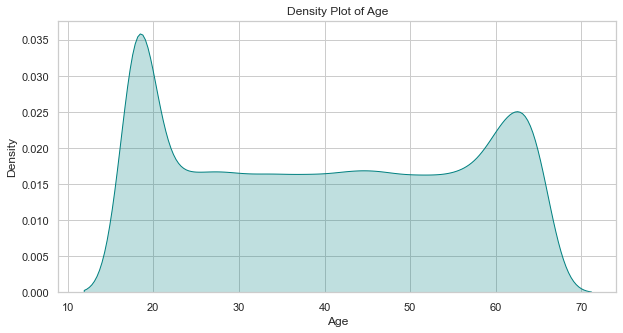

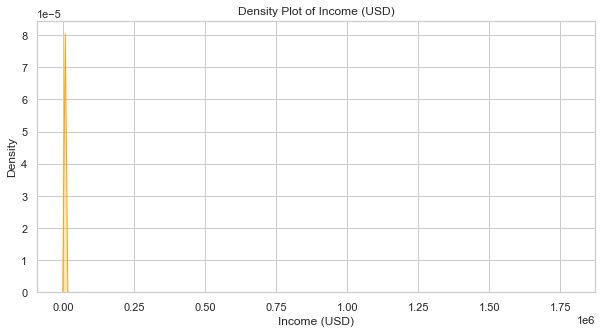

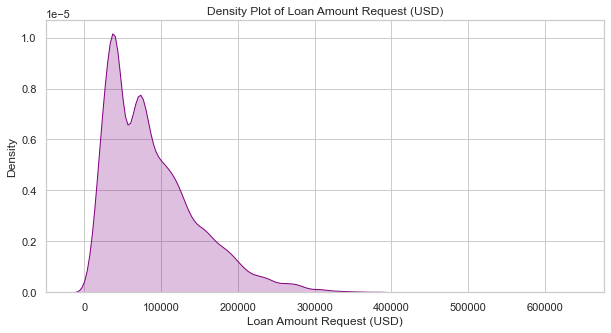

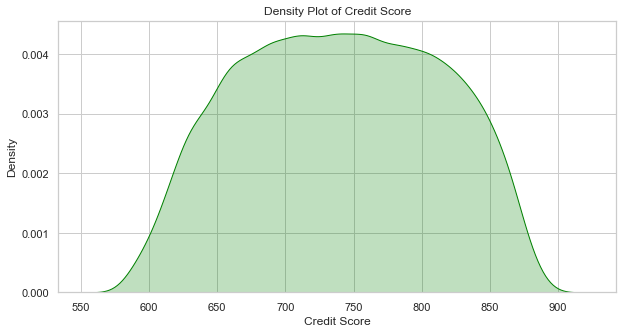

In [35]:
# Univariate Analysis
plot_density('Age', color='teal')
plot_density('Income (USD)', color='orange')
plot_density('Loan Amount Request (USD)', color='purple')
plot_density('Credit Score', color='green')


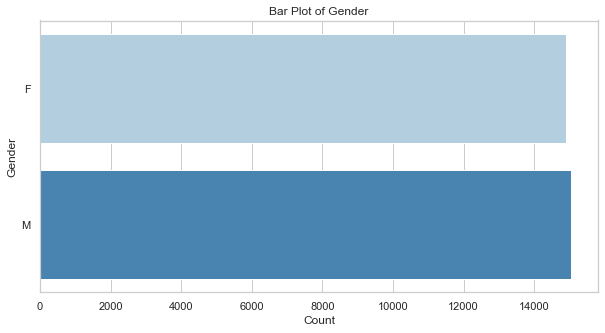

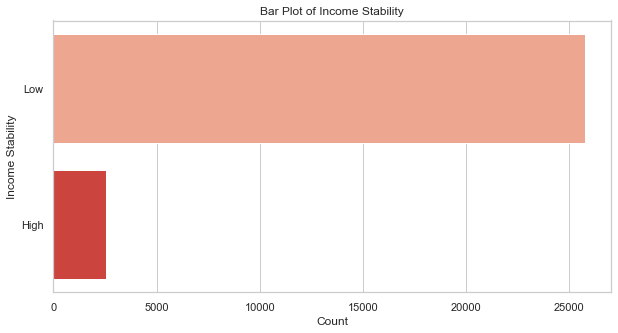

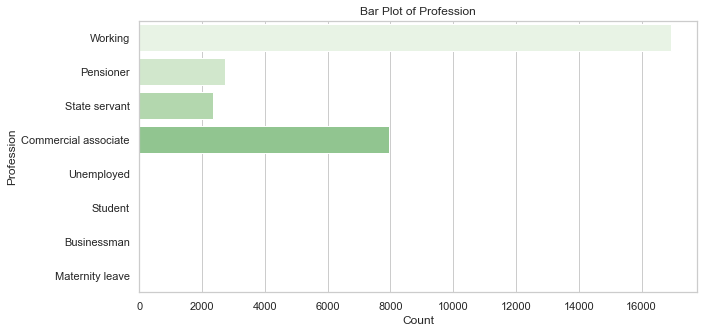

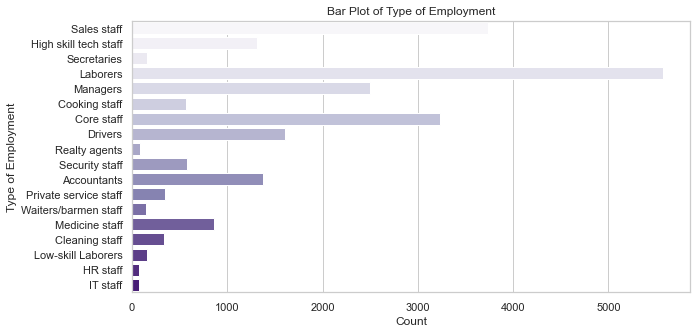

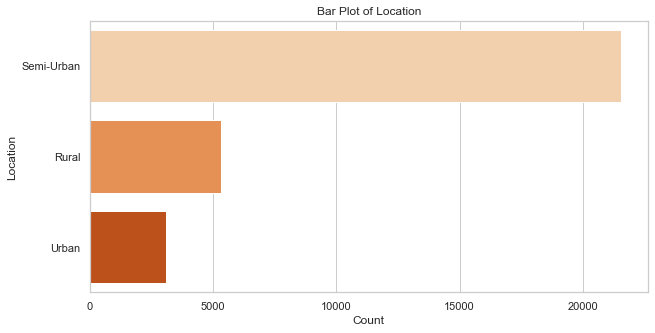

In [15]:
#bar plots

plot_barplot('Gender', palette='Blues')
plot_barplot('Income Stability', palette='Reds')
plot_barplot('Profession', palette='Greens')
plot_barplot('Type of Employment', palette='Purples')
plot_barplot('Location', palette='Oranges')


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


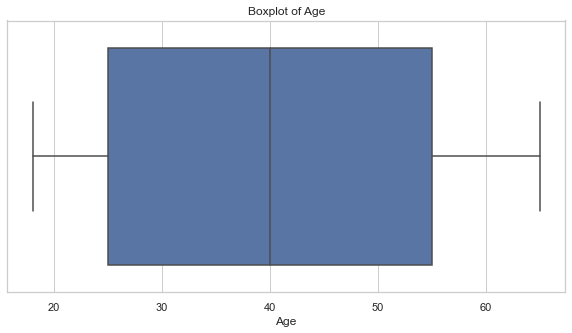

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


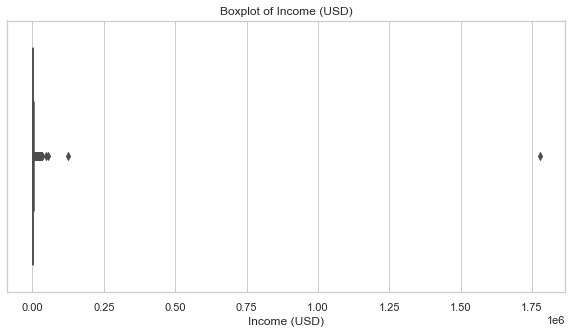

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


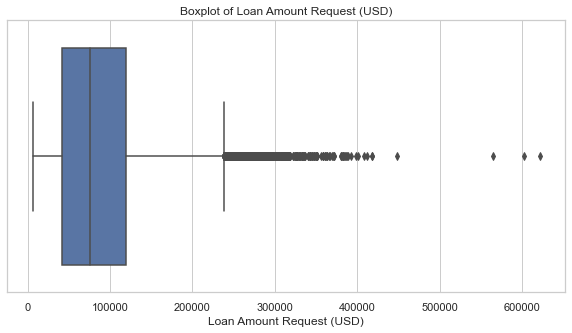

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


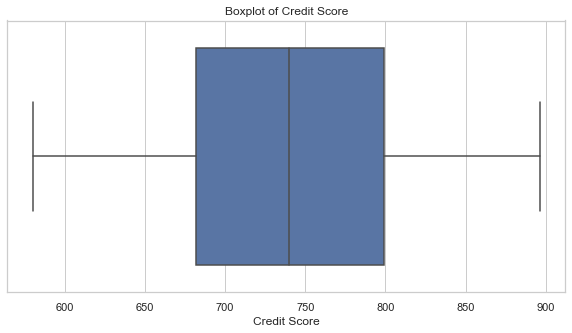

In [36]:
# Outlier Detection using Box Plots
plot_boxplot('Age')
plot_boxplot('Income (USD)')
plot_boxplot('Loan Amount Request (USD)')
plot_boxplot('Credit Score')


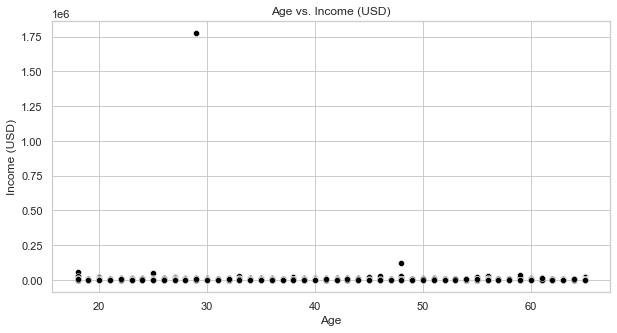

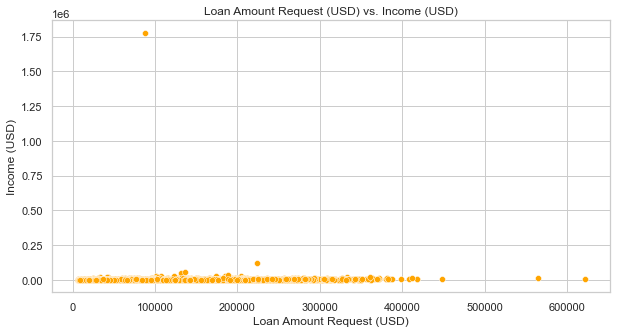

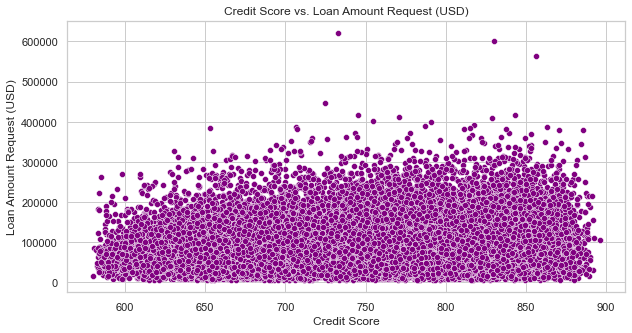

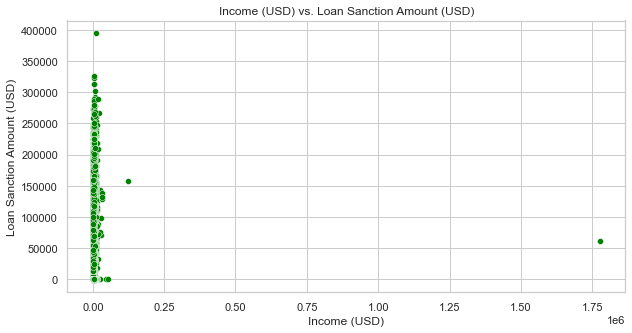

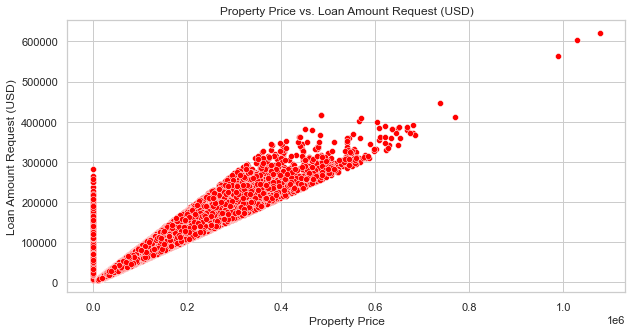

In [37]:
# Bivariate Analysis
plot_scatter('Age', 'Income (USD)', color='black')
plot_scatter('Loan Amount Request (USD)', 'Income (USD)', color='orange')
plot_scatter('Credit Score', 'Loan Amount Request (USD)', color='purple')
plot_scatter('Income (USD)', 'Loan Sanction Amount (USD)', color='green')
plot_scatter('Property Price', 'Loan Amount Request (USD)', color='red')

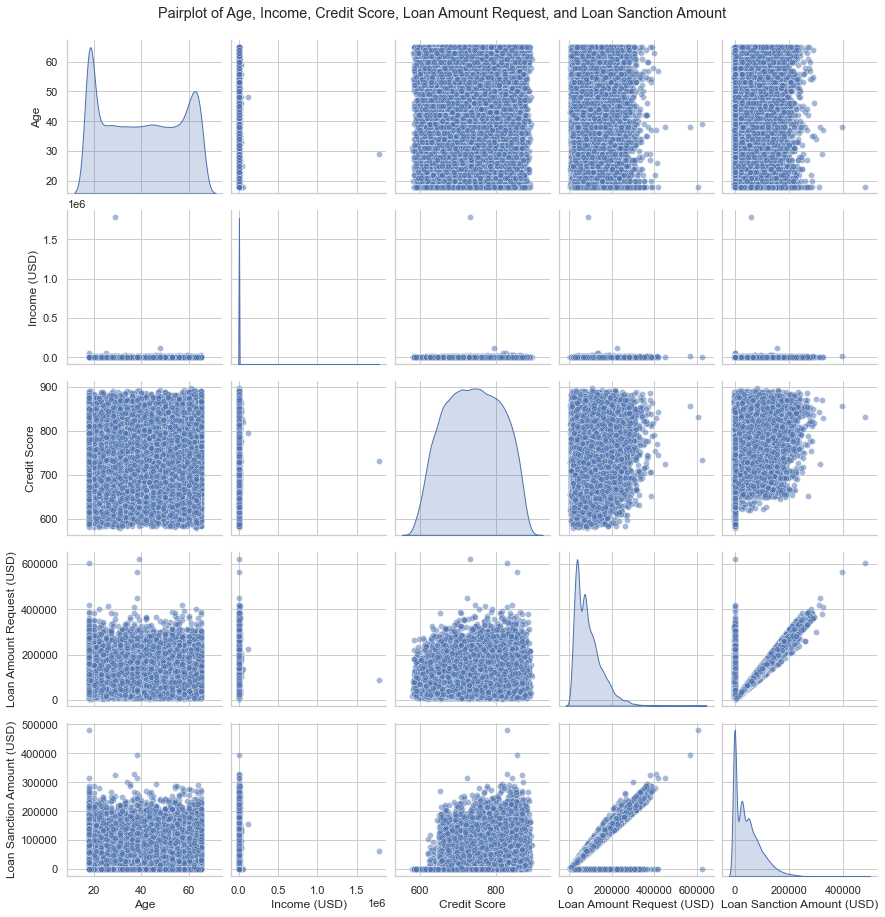

In [19]:
# Pairplot for multivariate analysis
sns.pairplot(data[['Age', 'Income (USD)', 'Credit Score', 'Loan Amount Request (USD)', 'Loan Sanction Amount (USD)']], 
             diag_kind='kde', 
             plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Age, Income, Credit Score, Loan Amount Request, and Loan Sanction Amount', y=1.02)
plt.show()



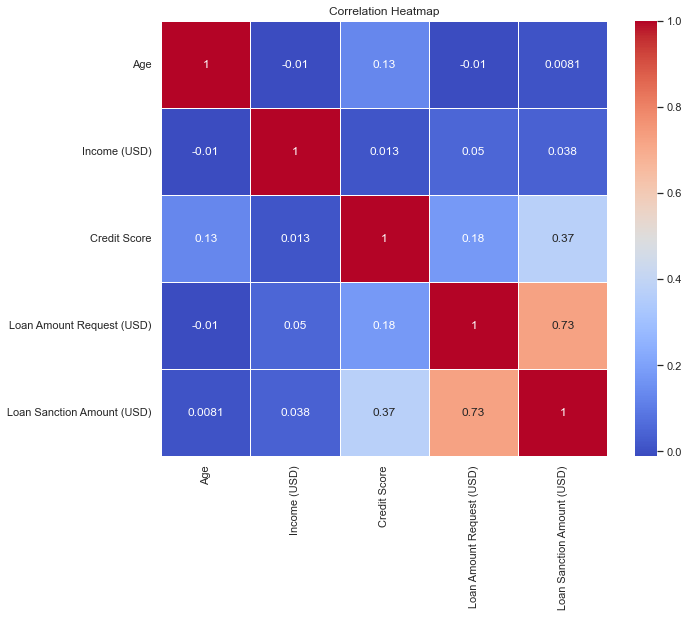

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Age', 'Income (USD)', 'Credit Score', 'Loan Amount Request (USD)', 'Loan Sanction Amount (USD)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
